In [13]:
# this is assignment submitted by SAI REVANTH MUPPARAJU for classification of data


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_deaths = pd.read_csv(r"Desktop\character-deaths.csv")
df_deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [14]:
df_deaths.shape[0]

917

In [15]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
Name                  917 non-null object
Allegiances           917 non-null object
Death Year            305 non-null float64
Book of Death         307 non-null float64
Death Chapter         299 non-null float64
Book Intro Chapter    905 non-null float64
Gender                917 non-null int64
Nobility              917 non-null int64
GoT                   917 non-null int64
CoK                   917 non-null int64
SoS                   917 non-null int64
FfC                   917 non-null int64
DwD                   917 non-null int64
dtypes: float64(4), int64(7), object(2)
memory usage: 93.2+ KB


In [16]:
df_deaths.shape[0] - df_deaths['Death Chapter'].dropna().shape[0]

618

In [17]:
df_deaths.describe()

,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
count,305.000000,307.000000,299.000000,905.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,299.157377,2.928339,40.070234,28.861878,0.828790,0.468920,0.272628,0.353326,0.424209,0.272628,0.284624
std,0.703483,1.326482,20.470270,20.165788,0.376898,0.499305,0.445554,0.478264,0.494492,0.445554,0.451481
min,297.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,299.000000,2.000000,25.500000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,299.000000,3.000000,39.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,300.000000,4.000000,57.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,300.000000,5.000000,80.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df_deaths.columns

Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object')

In [19]:

df_deaths = df_deaths.rename(columns=lambda x: x.replace(' ', '_').lower())
df_deaths.columns

Index(['name', 'allegiances', 'death_year', 'book_of_death', 'death_chapter',
       'book_intro_chapter', 'gender', 'nobility', 'got', 'cok', 'sos', 'ffc',
       'dwd'],
      dtype='object')

In [20]:
df_deaths_by_chapter = df_deaths.groupby('death_chapter' ).count()

In [24]:
def plot_it(x=[], y=[], kind="plot", title="Your chart", xlabel="x-axis", ylabel="y-axis"):
    """ This function plot different type of charts depending on args value. """
    if kind == "plot":
        plt.plot(x, y)
    elif kind == "scatter":
        plt.scatter(x, y)
    elif kind == "bar":
        plt.bar(x, y, color=np.random.rand(256,3))
    else:
        raise ValueError(kind + ' is not a supported type of chart.')
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 26
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

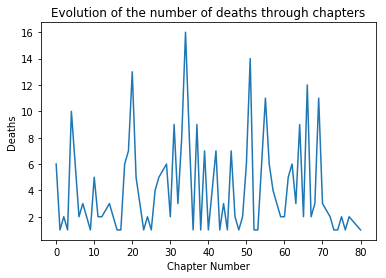

In [25]:
plot_it(df_deaths_by_chapter.index, df_deaths_by_chapter['name'], 'plot', 'Evolution of the number of deaths through chapters', 'Chapter Number', 'Deaths')

In [26]:
df_deaths['allegiances'].unique()

array(['Lannister', 'None', 'House Targaryen', 'House Greyjoy',
       'Baratheon', "Night's Watch", 'Arryn', 'House Stark',
       'House Tyrell', 'Tyrell', 'Stark', 'Greyjoy', 'House Lannister',
       'Martell', 'House Martell', 'Wildling', 'Targaryen', 'House Arryn',
       'House Tully', 'Tully', 'House Baratheon'], dtype=object)

In [28]:
df_deaths['allegiances'] = df_deaths['allegiances'].apply(lambda x: x.replace('House ', '').lower())
df_characters_by_allegiances = df_deaths.groupby('allegiances').count()
df_characters_by_allegiances[['name']]

,name
allegiances,
arryn,30
baratheon,64
greyjoy,75
lannister,102
martell,37
night's watch,116
none,253
stark,108
targaryen,36


In [30]:
df_deaths['death_chapter'] = df_deaths['death_chapter'].fillna('none')
df_dead_characters = df_deaths[df_deaths['death_chapter'] != 'none'].copy()
df_deaths_by_allegiances = df_dead_characters.groupby('allegiances').count()
df_deaths_by_allegiances[['name']]


,name
allegiances,
arryn,4
baratheon,23
greyjoy,22
lannister,29
martell,3
night's watch,56
none,73
stark,46
targaryen,9


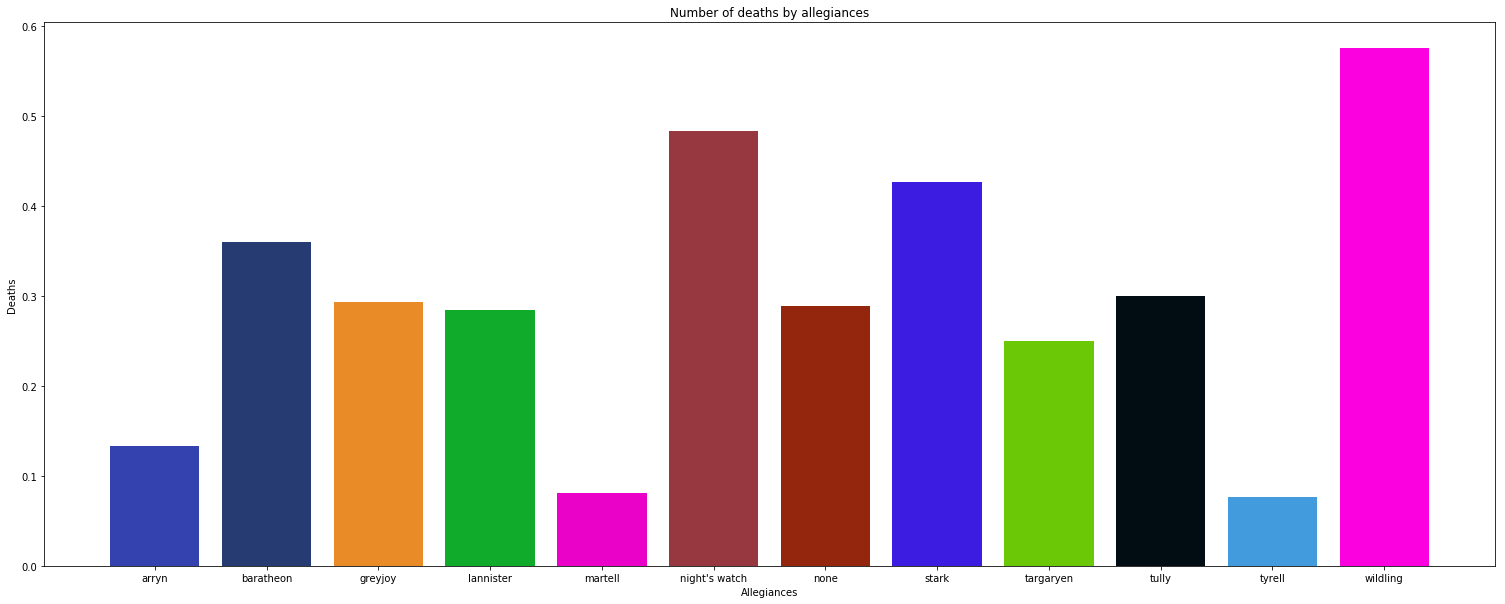

In [32]:
df_deaths_by_allegiances['death_proportion'] = df_deaths_by_allegiances['name'] / df_characters_by_allegiances['name']

plot_it(df_deaths_by_allegiances.index, df_deaths_by_allegiances['death_proportion'], 'bar', 'Number of deaths by allegiances', 'Allegiances', 'Deaths')

In [37]:
deaths_diffs = []

for i in range(10000):
    sample = df_deaths.sample(df_deaths.shape[0], replace=True)
    noble_probability = sample.query("nobility == 1 & death_chapter != 'none'").shape[0] / sample.query("nobility == 1").shape[0]
    not_noble_probability = sample.query("nobility == 0 & death_chapter != 'none'").shape[0] / sample.query("nobility == 0").shape[0]
    deaths_diffs.append(noble_probability - not_noble_probability)
    


In [40]:
deaths_diffs = np.array(deaths_diffs)

null_simulation = np.random.normal(0, deaths_diffs.std(), 10000)

In [41]:
df_dead_characters['alive_chapters'] = df_dead_characters['death_chapter'] - df_dead_characters['book_intro_chapter']
df_dead_characters = df_dead_characters[df_dead_characters['alive_chapters'] >= 0]
df_dead_characters[['alive_chapters']].head()

,alive_chapters
1,2
3,0
6,14
10,6
16,42
